In [193]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

In [194]:
song_features_df = pd.read_pickle('../data/processed/msd_subset_song_features_clean_df.pkl')

In [195]:
song_features_df.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,title,track_7digitalid,track_id,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums
0,22050,7725,0.687687,0.406686,ARDI88R1187B98DAB2,NaN,,NaN,fd87374e-ffde-4d36-89a8-8a073f795666,[],...,If I...,507029,TRACCSW128F148C7C3,0,0,346,86,10,934,692
1,22050,74269,0.593416,0.395710,ARZEWUR1187FB53DC8,50.45663,"Belgica -- Namur, Namur/Ghent, East Flanders",4.87137,0be59867-0da4-4e45-9b64-728cdf25487c,[],...,Ad Te Clamamus Exsvles Mortva Liberi,8688607,TRACCVS12903D014F8,2010,0,133,41,4,80,399
2,22050,49956,0.815923,0.555138,ARUZRFN1187B98AC05,NaN,"Cleveland, OH",NaN,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,[],...,Murder One,3510188,TRACCKS128F42B77AE,2000,0,426,426,11,1131,1277
3,22050,588,0.929030,0.750427,ARR3ONV1187B9A2F59,54.31407,UK,-2.23001,fd857293-5ab8-40de-b29e-55a69d4e4d0f,[],...,Bedroom Acoustics,5764770,TRACCUS128F92E1FEB,0,0,321,321,8,537,643
4,22050,11301,0.645192,0.471224,AR3THYK1187B999F1F,NaN,,NaN,286ec4c2-b5ca-4f85-b331-280a6d73dd14,"[brazilian, south american, brazilian classics...",...,Segredo,581259,TRACCJA128F149A144,2000,0,403,100,10,616,806


In [196]:
features = [
    'duration',
    'end_of_fade_in',
    'start_of_fade_out',
    'total_bars',
    'total_beats',
    'total_segments',
    'total_tatums',
    'tempo'
]

In [197]:
from sklearn.cluster import KMeans, DBSCAN

estimator = KMeans(n_clusters=5)
X = song_features_df[features]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

# Save the identified cluster to our DataFrame
song_features_df['cluster'] = pd.Series(labels, index=song_features_df.index)

Counter({0: 1932, 2: 1230, 1: 1112, 3: 313, 4: 23})


In [198]:
kanye_songs = song_features_df[song_features_df['is_kanye_song'] == 1]
kanye_songs.head(10)

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,track_7digitalid,track_id,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums,cluster
318,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,4658357,TRAIYZW128F9330F7D,2008,1,396,131,7,648,792,0
324,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,3332053,TRAIACZ128F428C60A,2005,1,318,79,9,1106,1274,1
620,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,159455,TRAXDML128E079159C,2005,1,608,149,12,1490,1215,1
1060,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,2417332,TRAYXDI128F428CD9C,2005,1,31,31,2,117,154,2
1918,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,334995,TRADMUH128F146D3CD,2003,1,745,186,11,1209,1490,1
2643,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,23435,TRAZBBP128E07845D4,2003,1,154,30,3,209,154,2
3222,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,3931254,TRAQZQX128F931338F,2010,1,432,105,12,1014,864,0
3687,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,511692,TRBIEIZ128F148D778,2005,1,333,79,8,1033,999,0
4289,22050,822,0.877214,1.082503,ARRH63Y1187FB47783,NaN,"Atlanta, GA",NaN,164f0d73-1234-4e2c-8743-d77bf2191051,"[hip-hop, american, hip hop rnb and dance hall...",...,159448,TRBDBIU128E0791595,2005,1,30,30,2,116,154,2


In [235]:
kanye_songs['title'].unique()

array(['Street Lights', "Heard 'Em Say", 'Gone',
       'Skit #2 (Kanye West/Late Registration)', 'Through The Wire',
       'School Spirit Skit 2', 'Touch The Sky',
       'Diamonds From Sierra Leone'], dtype=object)

In [199]:
kanye_clusters = sorted(kanye_songs['cluster'].unique())
print kanye_clusters

[0, 1, 2]


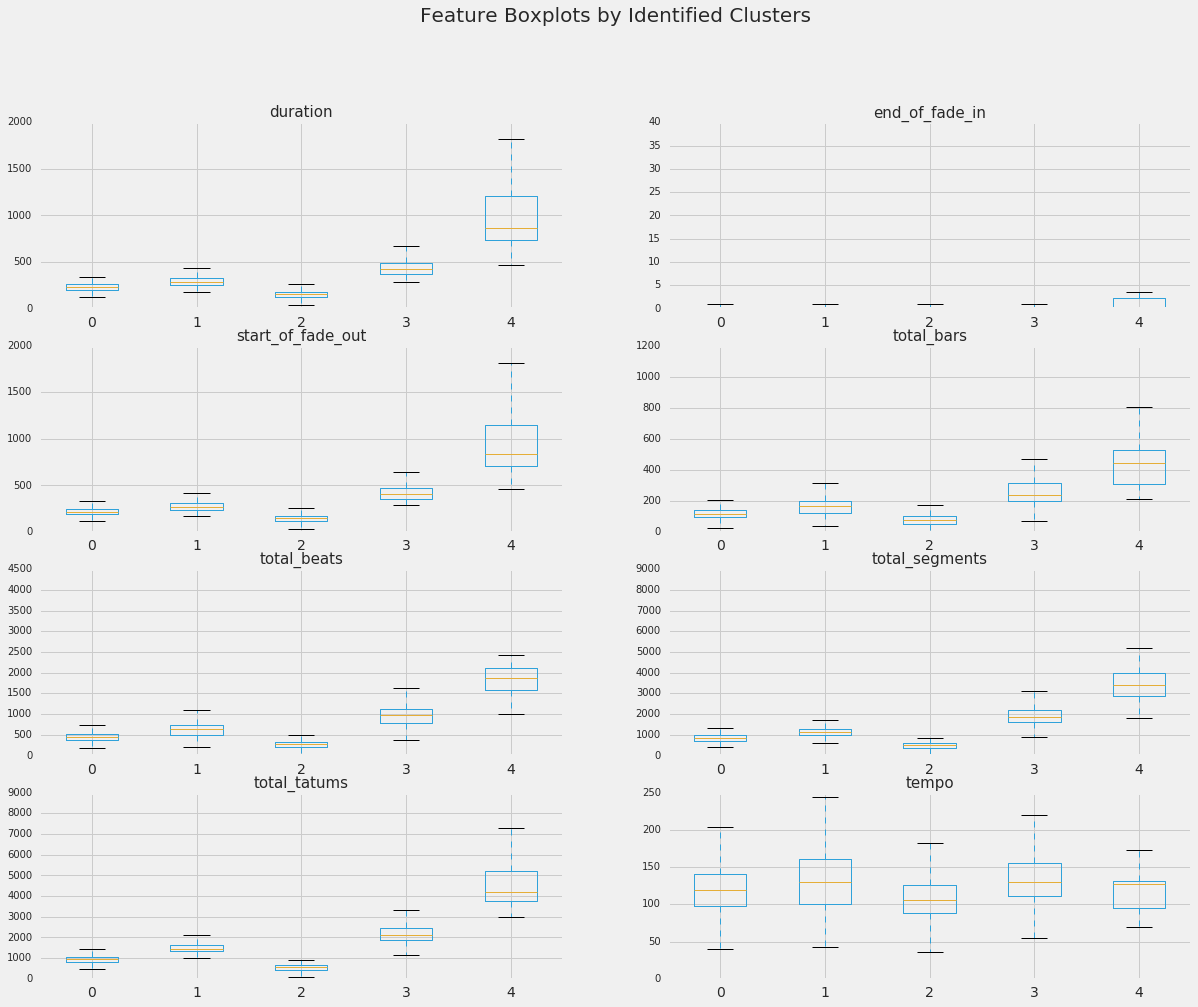

In [200]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))

for i in range(len(features)):
    v = i +1
    ax1 = song_features_df.boxplot(features[i], by='cluster', ax=plt.subplot(5,2,v))
    ax1.set_title(str(features[i]), fontsize=15)
    ax1.set_xlabel('')
    
plt.suptitle('Feature Boxplots by Identified Clusters', size=20)

In [201]:
clusters = sorted(song_features_df['cluster'].unique())
for i in clusters:
    cluster_group = song_features_df[song_features_df['cluster'] == i]
    cluster_group = cluster_group[pd.notnull(cluster_group['artist_hotttnesss'])]
    cluster_group.sort_values(by='artist_hotttnesss', ascending=False, inplace=True)
    print 'Top 10 Songs (By Aritst Popularity) for Cluster %s' %i
    print
    print cluster_group[['artist_name', 'title', 'artist_hotttnesss']].head(10)
    print

Top 10 Songs (By Aritst Popularity) for Cluster 0

                                  artist_name                       title  \
3687                               Kanye West  Diamonds From Sierra Leone   
318                                Kanye West               Street Lights   
3222                 Kanye West / Lupe Fiasco               Touch The Sky   
540                           Black Eyed Peas        Let's Get It Started   
248            Black Eyed Peas / Terry Dexter                       Magic   
1750  Black Eyed Peas / Les Nubians / Mos Def                   On My Own   
1276                          Black Eyed Peas        Let's Get It Started   
4236                                  Rihanna          Good Girl Gone Bad   
1580                                  Rihanna                         SOS   
2080                                  Rihanna          Good Girl Gone Bad   

      artist_hotttnesss  
3687           1.082503  
318            1.082503  
3222           1.082503

1. Use normalization
2. Compute the cosine
3. Find the max

In [202]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between our
# subset of Ye songs and the rest of our songs
# dataset
X = kanye_songs[features]
Y = song_features_df[features]
similarity = cosine_similarity(X, Y)

# Store the cosine distance results in our dataframe
song_features_df['cosine_distance'] = similarity.T.tolist()

In [203]:
# # A list of dictionaries containing the row index as the
# # key and the max cosine distance as the value
# kanye_similarity_index = list()

# for row in song_features_df.itertuples():
#     max_distance = 0
#     for idx, d in enumerate(row.cosine_distance):
#         if d != 1.0 and d > max_distance:
#             max_distance = d
#     kanye_similarity_index.append({ row.Index: max_distance })

In [204]:
def get_max_cosine_distance(distances):
    max_distance = 0.0
    for idx, d in enumerate(distances):
        if d != 1.0 and d > max_distance:
            max_distance = d
    return max_distance

In [205]:
song_features_df['kanye_similarity'] = song_features_df['cosine_distance'].apply(get_max_cosine_distance)

In [206]:
song_features_df.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,year,is_kanye_song,total_beats,total_bars,total_sections,total_segments,total_tatums,cluster,cosine_distance,kanye_similarity
0,22050,7725,0.687687,0.406686,ARDI88R1187B98DAB2,NaN,,NaN,fd87374e-ffde-4d36-89a8-8a073f795666,[],...,0,0,346,86,10,934,692,0,"[0.970068365006, 0.969574050092, 0.99848643386...",0.998486
1,22050,74269,0.593416,0.395710,ARZEWUR1187FB53DC8,50.45663,"Belgica -- Namur, Namur/Ghent, East Flanders",4.87137,0be59867-0da4-4e45-9b64-728cdf25487c,[],...,2010,0,133,41,4,80,399,2,"[0.900446053971, 0.861852289996, 0.79966036836...",0.901572
2,22050,49956,0.815923,0.555138,ARUZRFN1187B98AC05,NaN,"Cleveland, OH",NaN,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,[],...,2000,0,426,426,11,1131,1277,1,"[0.983257131846, 0.980153309979, 0.97383144779...",0.983257
3,22050,588,0.929030,0.750427,ARR3ONV1187B9A2F59,54.31407,UK,-2.23001,fd857293-5ab8-40de-b29e-55a69d4e4d0f,[],...,0,0,321,321,8,537,643,2,"[0.976021756652, 0.939130861704, 0.94717766441...",0.976022
4,22050,11301,0.645192,0.471224,AR3THYK1187B999F1F,NaN,,NaN,286ec4c2-b5ca-4f85-b331-280a6d73dd14,"[brazilian, south american, brazilian classics...",...,2000,0,403,100,10,616,806,0,"[0.999139925488, 0.97515750271, 0.973118496509...",0.999140


In [207]:
song_features_df['kanye_similarity'].min()

0.65132022293981795

In [208]:
song_features_df['kanye_similarity'].max()

1.0000000000000004

In [228]:
top_matches = song_features_df.groupby(['artist_name'])['kanye_similarity'].apply(np.max)
top_matches = top_matches.sort_values(ascending=False)
top_matches.head(30)

artist_name
Kanye West                            1.000000
Kanye West / Consequence / Cam'Ron    1.000000
Mista                                 0.999987
Princess Lover                        0.999983
Mykill Miers                          0.999983
Michael McDonald                      0.999980
Brooke Valentine                      0.999976
Dub Pistols feat. TK & JMS            0.999976
DJ Quik                               0.999974
The Winans                            0.999970
themselves                            0.999962
Leroy Hutson                          0.999961
Tha Chamba                            0.999960
Rakim feat. Tracey Horton             0.999956
Pete Philly & Perquisite              0.999954
OutKast                               0.999945
The Shamen                            0.999945
Eric Champion                         0.999941
Toni Braxton                          0.999940
Twista                                0.999937
Eminem                                0.999934
L

In [233]:
clean_years = song_features_df[song_features_df['year'] >= 2001]

In [234]:
top_matches = clean_years.groupby(['artist_name'])['kanye_similarity'].apply(np.max)
top_matches = top_matches.sort_values(ascending=False)
top_matches.head(50)

artist_name
Kanye West                                                     1.000000
Kanye West / Consequence / Cam'Ron                             1.000000
Princess Lover                                                 0.999983
Brooke Valentine                                               0.999976
themselves                                                     0.999962
Rakim feat. Tracey Horton                                      0.999956
Twista                                                         0.999937
Aesop Rock                                                     0.999910
Sub Focus                                                      0.999909
Eddie                                                          0.999890
Deftones                                                       0.999885
Kirk Franklin                                                  0.999883
The Killers                                                    0.999878
Jay-Z                                               

In [238]:
song_features_df[song_features_df['artist_name'] == 'Jay-Z']['title']

3349    Change Clothes
Name: title, dtype: object